### Етап 3. Тестування та дослідження ефективності

In [20]:
import os
import time
import matplotlib.pyplot as plt
from algorithms.LZ77 import LZ77
from algorithms.LZ78 import LZ78Compressor
from algorithms.LZW import LZWCompressor
from algorithms.RLE import RLECompressor
from algorithms.huffman_coding import HuffmanTree
from algorithms.deflate import Deflate

### Формат - txt, семпл - "Місто" В. Підмогильний

початковий розмір файлу

In [21]:
misto_size = os.stat('./test/pidmohylnyy-valerian-petrovych-misto76.txt').st_size
print(f'Початковий розмір файлу: {misto_size} KB')

Початковий розмір файлу: 911282 KB


In [22]:
def test_size_compression(name: str, filename: str): 
    algorithms = {"huffman": HuffmanTree(),
                  "lz77": LZ77(),
                  "lz78": LZ78Compressor(),
                  "lzw": LZWCompressor(),
                  "rle": RLECompressor(),
                  "deflate": Deflate()}
    
    if name in algorithms:
        compression_time_start = time.time()
        algorithms[name].compress_file(filename)
        compression_time_end = time.time()
        compression_size = os.stat(f'./compressed_{name}.bin').st_size

    return compression_size, f'{compression_time_end - compression_time_start: .2f}'

In [23]:
def test_size_decompression(name: str, filename: str):
    algorithms = {"huffman": HuffmanTree(),
                  "lz77": LZ77(),
                  "lz78": LZ78Compressor(),
                  "lzw": LZWCompressor(),
                  "rle": RLECompressor()}
    decompression_time_end, decompression_time_start = 0, 0

    if name in algorithms:
        decompression_time_start = time.time()
        algorithms[name].decompress_file(filename)
        decompression_time_end = time.time()

    return f'{decompression_time_end - decompression_time_start: .2f}'

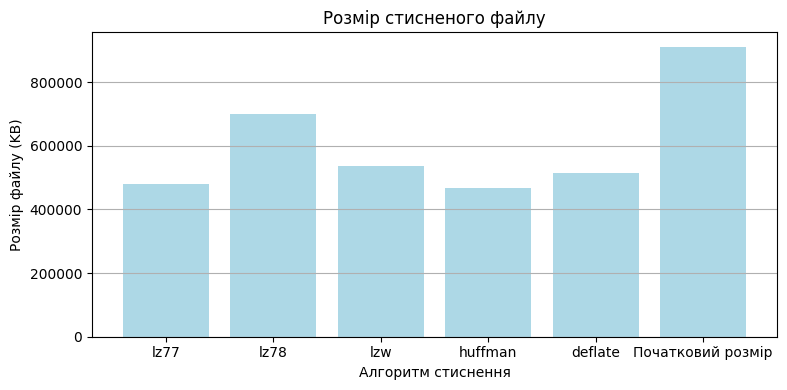

In [24]:
size_compression = {}
algorithms = ["lz77", "lz78", "lzw", "huffman", "deflate"]
for algorithm in algorithms:
    size_compression[algorithm] = test_size_compression(algorithm, './test/pidmohylnyy-valerian-petrovych-misto76.txt')

sizes = [alg[0] for alg in list(size_compression.values())]
algorithms.append("Початковий розмір")
sizes.append(misto_size)

plt.figure(figsize=(8, 4))
plt.bar(algorithms, sizes, color='lightblue')
plt.title("Розмір стисненого файлу")
plt.ylabel("Розмір файлу (KB)")
plt.xlabel("Алгоритм стиснення")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

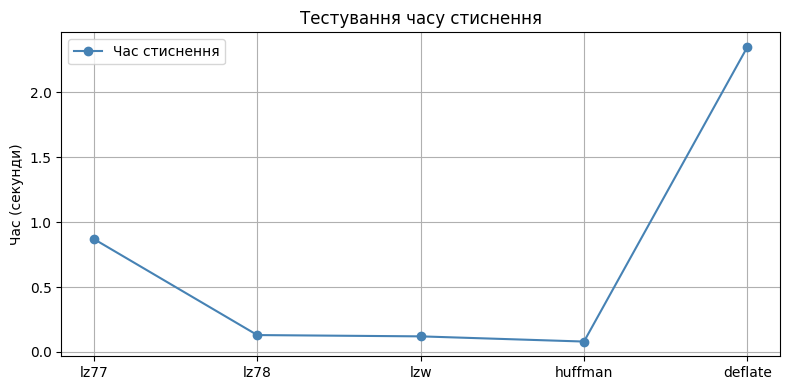

In [25]:
times = [float(alg[1].strip()) for alg in list(size_compression.values())]

plt.figure(figsize=(8, 4))
plt.plot(algorithms[:-1], times, marker='o', linestyle='-', color='steelblue', label="Час стиснення")

plt.title("Тестування часу стиснення")
plt.ylabel("Час (секунди)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

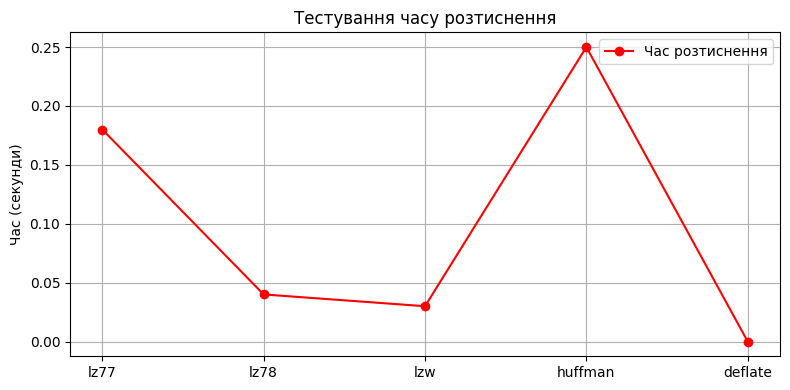

In [26]:
time_compression = {}
for algorithm in ["lz77", "lz78", "lzw", "huffman", "deflate"]:
    time_compression[algorithm] = test_size_decompression(algorithm, f'./compressed_{algorithm}.bin')

times_decompress = [float(alg.strip()) for alg in list(time_compression.values())]

plt.figure(figsize=(8, 4))
plt.plot(algorithms[:-1], times_decompress, marker='o', linestyle='-', color='red', label="Час розтиснення")

plt.title("Тестування часу розтиснення")
plt.ylabel("Час (секунди)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Формат - txt, семпл - "Holy Bible"

початковий розмір файлу

In [27]:
bible_size = os.stat('./test/CSB_Pew_Bible_2nd_Printing.txt').st_size
print(f'Початковий розмір файлу: {bible_size} KB')

Початковий розмір файлу: 5705523 KB


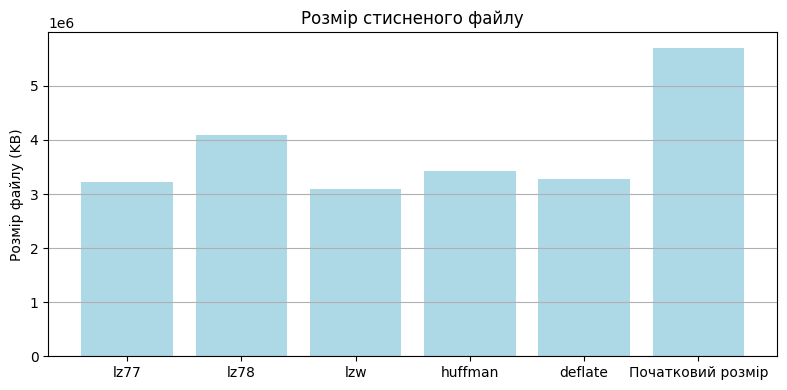

In [28]:
size_compression_b = {}
algorithms = ["lz77", "lz78", "lzw", "huffman", "deflate"]
for algorithm in algorithms:
    size_compression_b[algorithm] = test_size_compression(algorithm, './test/CSB_Pew_Bible_2nd_Printing.txt')

sizes_b = [alg[0] for alg in list(size_compression_b.values())]
algorithms.append("Початковий розмір")
sizes_b.append(bible_size)

plt.figure(figsize=(8, 4))
plt.bar(algorithms, sizes_b, color='lightblue')
plt.title("Розмір стисненого файлу")
plt.ylabel("Розмір файлу (KB)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

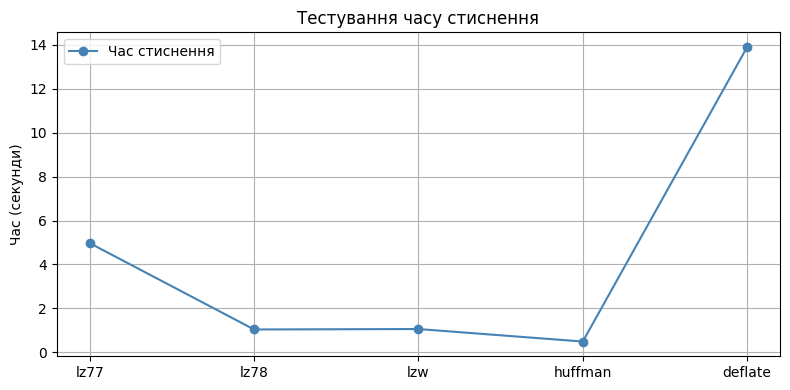

In [29]:
times_b = [float(alg[1].strip()) for alg in list(size_compression_b.values())]

plt.figure(figsize=(8, 4))
plt.plot(algorithms[:-1], times_b, marker='o', linestyle='-', color='steelblue', label="Час стиснення")

plt.title("Тестування часу стиснення")
plt.ylabel("Час (секунди)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

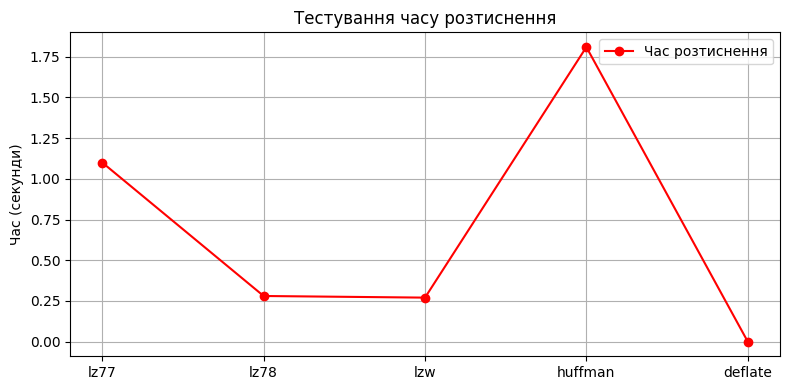

In [30]:
time_compression = {}
for algorithm in ["lz77", "lz78", "lzw", "huffman", "deflate"]:
    time_compression[algorithm] = test_size_decompression(algorithm, f'./compressed_{algorithm}.bin')

times_decompress = [float(alg.strip()) for alg in list(time_compression.values())]

plt.figure(figsize=(8, 4))
plt.plot(algorithms[:-1], times_decompress, marker='o', linestyle='-', color='red', label="Час розтиснення")

plt.title("Тестування часу розтиснення")
plt.ylabel("Час (секунди)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Формат - json, семпл - large-json.file, 11352 рядків

початковий розмір файлу

In [31]:
json_size = os.stat('./test/large-file.json').st_size
print(f'Початковий розмір файлу: {json_size} KB')

Початковий розмір файлу: 26141343 KB


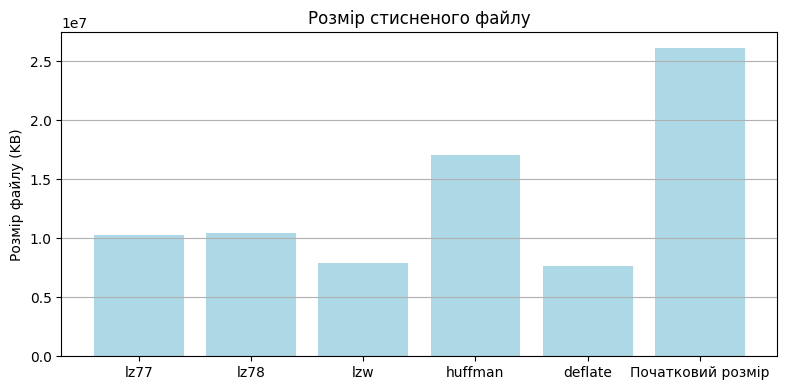

In [32]:
size_compression_j = {}
algorithms = ["lz77", "lz78", "lzw", "huffman", "deflate"]
for algorithm in algorithms:
    size_compression_j[algorithm] = test_size_compression(algorithm, './test/large-file.json')

sizes_j = [alg[0] for alg in list(size_compression_j.values())]
algorithms.append("Початковий розмір")
sizes_j.append(json_size)

plt.figure(figsize=(8, 4))
plt.bar(algorithms, sizes_j, color='lightblue')
plt.title("Розмір стисненого файлу")
plt.ylabel("Розмір файлу (KB)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

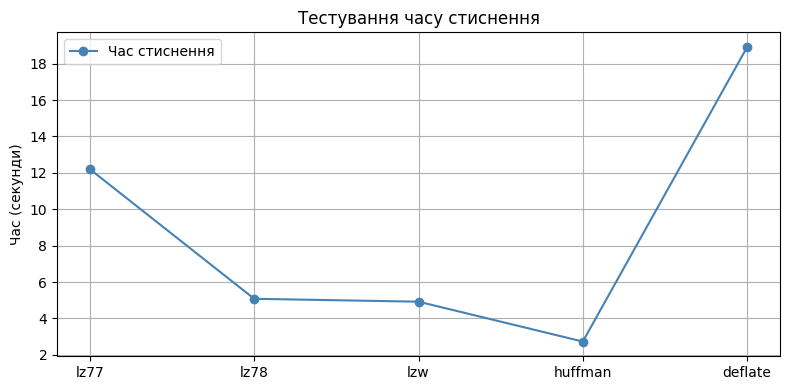

In [33]:
times_j = [float(alg[1].strip()) for alg in list(size_compression_j.values())]

plt.figure(figsize=(8, 4))
plt.plot(algorithms[:-1], times_j, marker='o', linestyle='-', color='steelblue', label="Час стиснення")

plt.title("Тестування часу стиснення")
plt.ylabel("Час (секунди)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

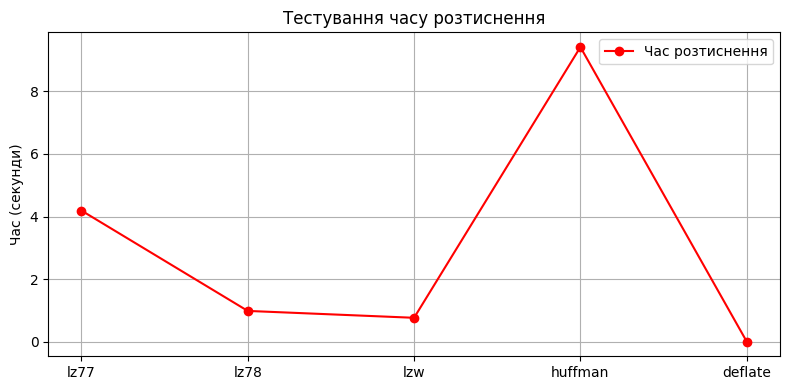

In [34]:
time_compression = {}
for algorithm in ["lz77", "lz78", "lzw", "huffman", "deflate"]:
    time_compression[algorithm] = test_size_decompression(algorithm, f'./compressed_{algorithm}.bin')

times_decompress = [float(alg.strip()) for alg in list(time_compression.values())]

plt.figure(figsize=(8, 4))
plt.plot(algorithms[:-1], times_decompress, marker='o', linestyle='-', color='red', label="Час розтиснення")

plt.title("Тестування часу розтиснення")
plt.ylabel("Час (секунди)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Формат - csv, семпл - 100000 рядків

початковий розмір файлу

In [35]:
csv_size = os.stat('./test/customers-100000.csv').st_size
print(f'Початковий розмір файлу: {csv_size} KB')

Початковий розмір файлу: 17317579 KB


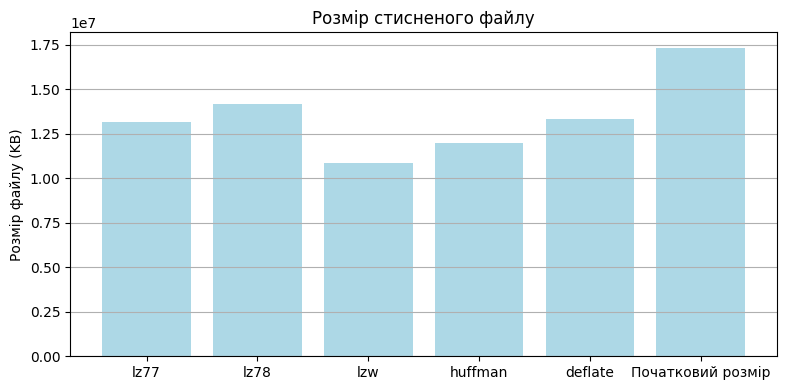

In [36]:
size_compression_c = {}
algorithms = ["lz77", "lz78", "lzw", "huffman", "deflate"]
for algorithm in algorithms:
    size_compression_c[algorithm] = test_size_compression(algorithm, './test/customers-100000.csv')

sizes_c = [alg[0] for alg in list(size_compression_c.values())]
algorithms.append("Початковий розмір")
sizes_c.append(csv_size)

plt.figure(figsize=(8, 4))
plt.bar(algorithms, sizes_c, color='lightblue')
plt.title("Розмір стисненого файлу")
plt.ylabel("Розмір файлу (KB)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

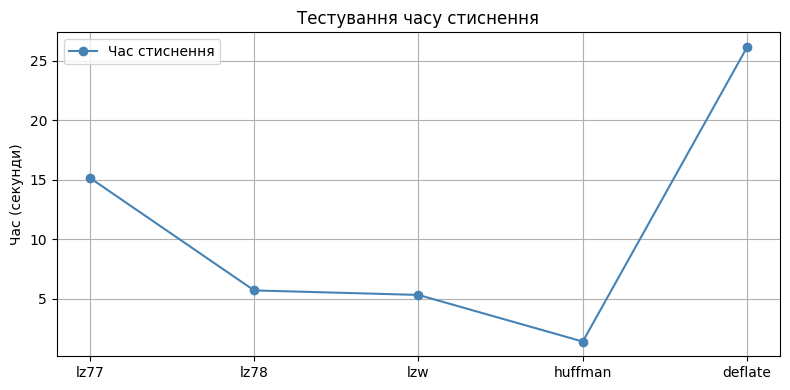

In [37]:
times_c = [float(alg[1].strip()) for alg in list(size_compression_c.values())]

plt.figure(figsize=(8, 4))
plt.plot(algorithms[:-1], times_c, marker='o', linestyle='-', color='steelblue', label="Час стиснення")

plt.title("Тестування часу стиснення")
plt.ylabel("Час (секунди)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

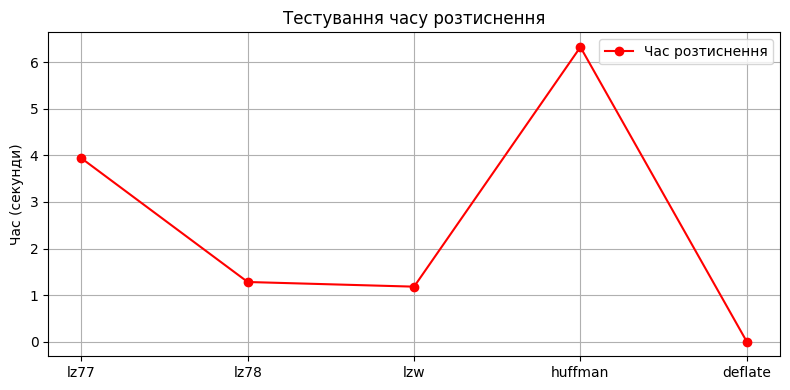

In [38]:
time_compression = {}
for algorithm in ["lz77", "lz78", "lzw", "huffman", "deflate"]:
    time_compression[algorithm] = test_size_decompression(algorithm, f'./compressed_{algorithm}.bin')

times_decompress = [float(alg.strip()) for alg in list(time_compression.values())]

plt.figure(figsize=(8, 4))
plt.plot(algorithms[:-1], times_decompress, marker='o', linestyle='-', color='red', label="Час розтиснення")

plt.title("Тестування часу розтиснення")
plt.ylabel("Час (секунди)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Формат - bmp

початковий розмір файлу

In [39]:
bmp_size = os.stat('./test/img.bmp').st_size
print(f'Початковий розмір файлу: {bmp_size} KB')

Початковий розмір файлу: 551596 KB


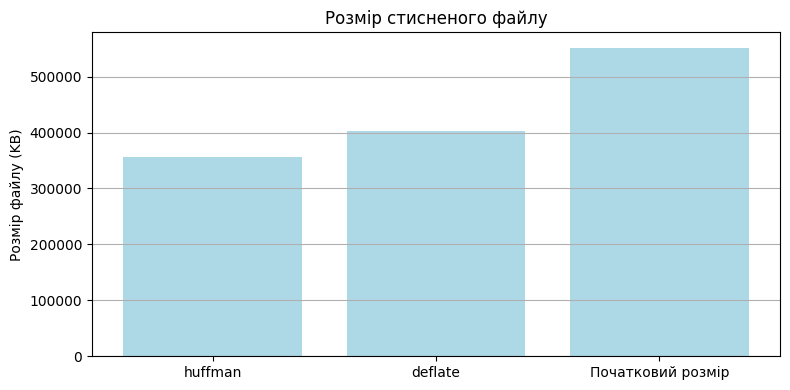

In [40]:
size_compression_bmp = {}
algorithms = ["huffman", "deflate"]
for algorithm in algorithms:
    size_compression_bmp[algorithm] = test_size_compression(algorithm, './test/img.bmp')

sizes_bmp = [alg[0] for alg in list(size_compression_bmp.values())]
algorithms.append("Початковий розмір")
sizes_bmp.append(bmp_size)

plt.figure(figsize=(8, 4))
plt.bar(algorithms, sizes_bmp, color='lightblue')
plt.title("Розмір стисненого файлу")
plt.ylabel("Розмір файлу (KB)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

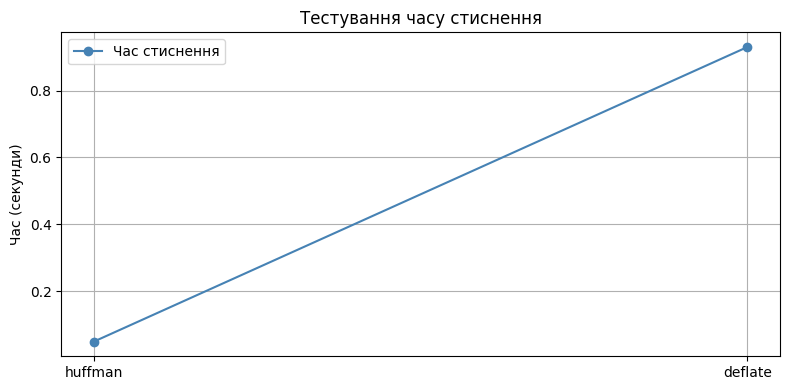

In [41]:
times_bmp = [float(alg[1].strip()) for alg in list(size_compression_bmp.values())]

plt.figure(figsize=(8, 4))
plt.plot(algorithms[:-1], times_bmp, marker='o', linestyle='-', color='steelblue', label="Час стиснення")

plt.title("Тестування часу стиснення")
plt.ylabel("Час (секунди)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

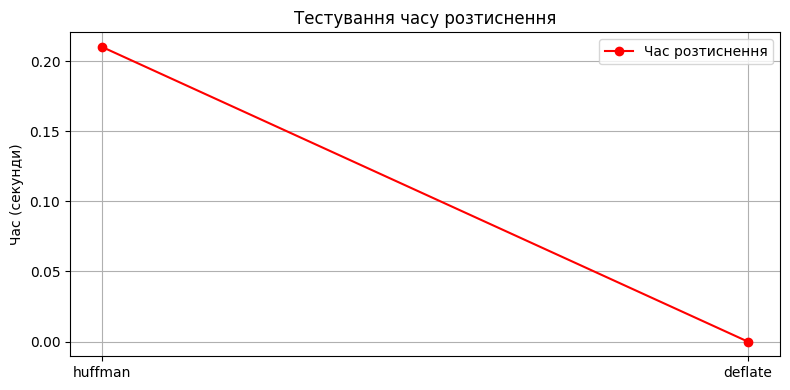

In [42]:
time_compression = {}
for algorithm in ["huffman", "deflate"]:
    time_compression[algorithm] = test_size_decompression(algorithm, f'./compressed_{algorithm}.bin')

times_decompress = [float(alg.strip()) for alg in list(time_compression.values())]

plt.figure(figsize=(8, 4))
plt.plot(algorithms[:-1], times_decompress, marker='o', linestyle='-', color='red', label="Час розтиснення")

plt.title("Тестування часу розтиснення")
plt.ylabel("Час (секунди)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Формат - jpg

початковий розмір файлу

In [43]:
jpg_size = os.stat('./test/SampleJPGImage_20mbmb.jpg').st_size
print(f'Початковий розмір файлу: {jpg_size} KB')

Початковий розмір файлу: 21348301 KB


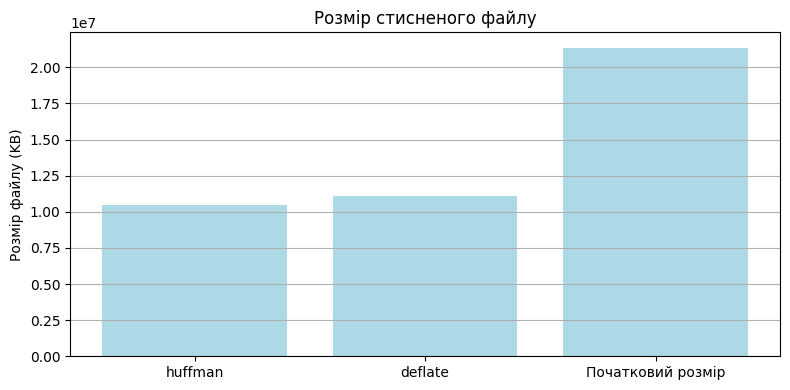

In [44]:
size_compression_jpg = {}
algorithms = ["huffman", "deflate"]
for algorithm in algorithms:
    size_compression_jpg[algorithm] = test_size_compression(algorithm, './test/SamplePNGImage_10mbmb.png')

sizes_jpg = [alg[0] for alg in list(size_compression_jpg.values())]
algorithms.append("Початковий розмір")
sizes_jpg.append(jpg_size)

plt.figure(figsize=(8, 4))
plt.bar(algorithms, sizes_jpg, color='lightblue')
plt.title("Розмір стисненого файлу")
plt.ylabel("Розмір файлу (KB)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

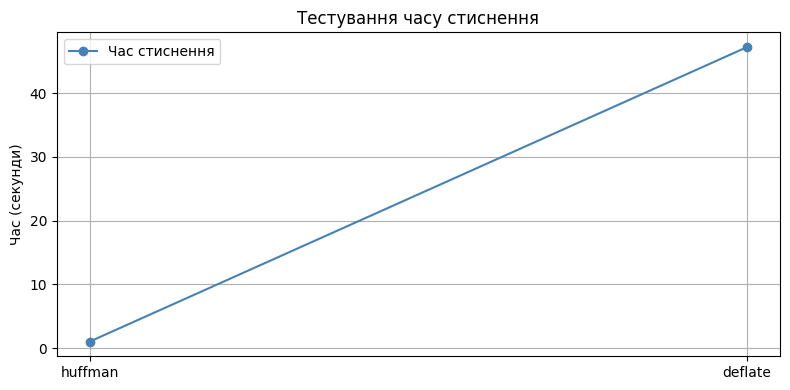

In [45]:
times_jpg = [float(alg[1].strip()) for alg in list(size_compression_jpg.values())]

plt.figure(figsize=(8, 4))
plt.plot(algorithms[:-1], times_jpg, marker='o', linestyle='-', color='steelblue', label="Час стиснення")

plt.title("Тестування часу стиснення")
plt.ylabel("Час (секунди)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Формат - wav

початковий розмір файлу

In [46]:
wav_size = os.stat('./test/Ouch-1.wav').st_size
print(f'Початковий розмір файлу: {wav_size} KB')

Початковий розмір файлу: 25784 KB


In [47]:
huffman = HuffmanTree()

start_huffman_compression = time.time()
huffman_flac = huffman.compress_file('./test/Ouch-1.wav')
end_huffman_compression = time.time()

start_huffman_decompression = time.time()
huffman.decompress_file('compressed_huffman.bin')
end_huffman_decompression = time.time()

huffman_flac_size = os.stat('compressed_huffman.bin').st_size
print(f'Розмір після стиснення алгоритмом Гаффмана: {huffman_flac_size} KB')
print(f'Час стиснення алгоритмом Гаффмана: {end_huffman_compression - start_huffman_compression:.2f} секунд')
print(f'Час декомпресування алгоритмом Гаффмана: {end_huffman_decompression - start_huffman_decompression:.2f} секунд')


Розмір після стиснення алгоритмом Гаффмана: 22336 KB
Час стиснення алгоритмом Гаффмана: 0.04 секунд
Час декомпресування алгоритмом Гаффмана: 0.01 секунд
